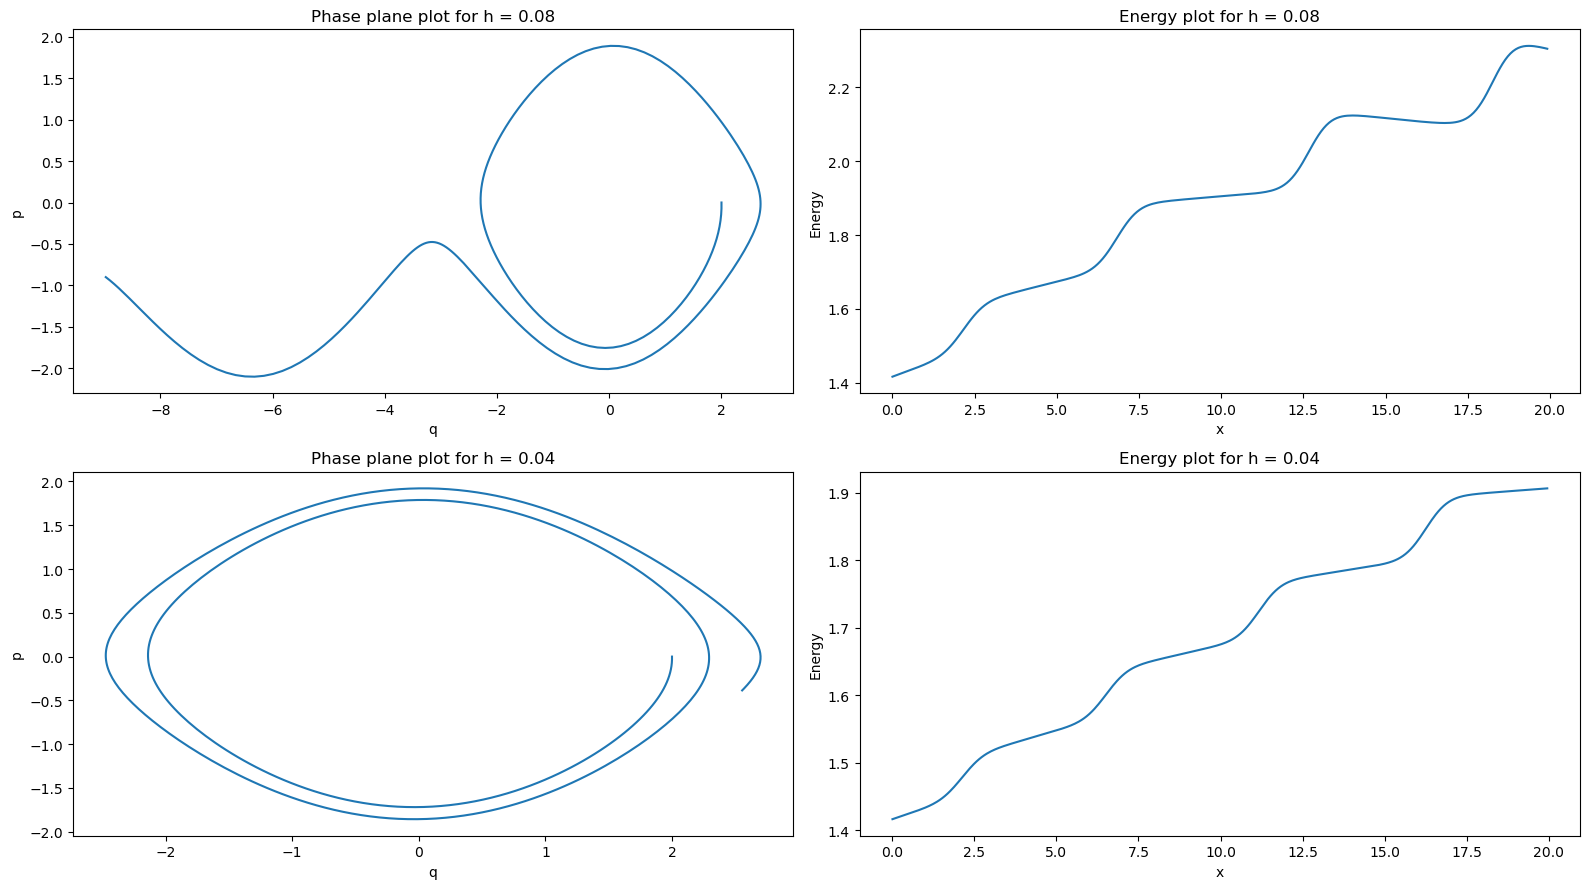

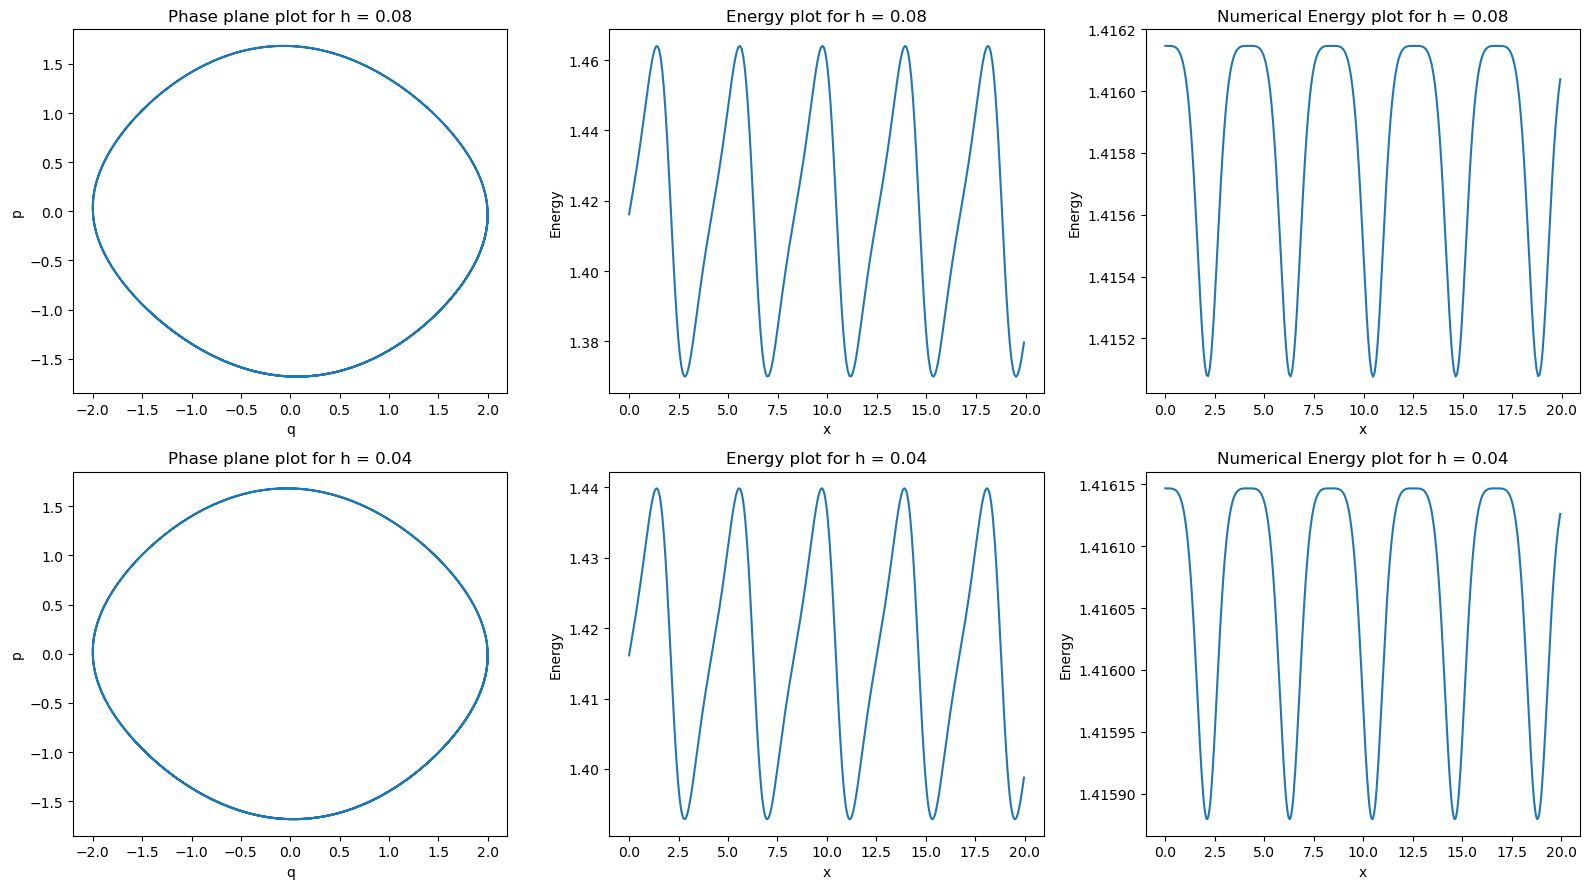

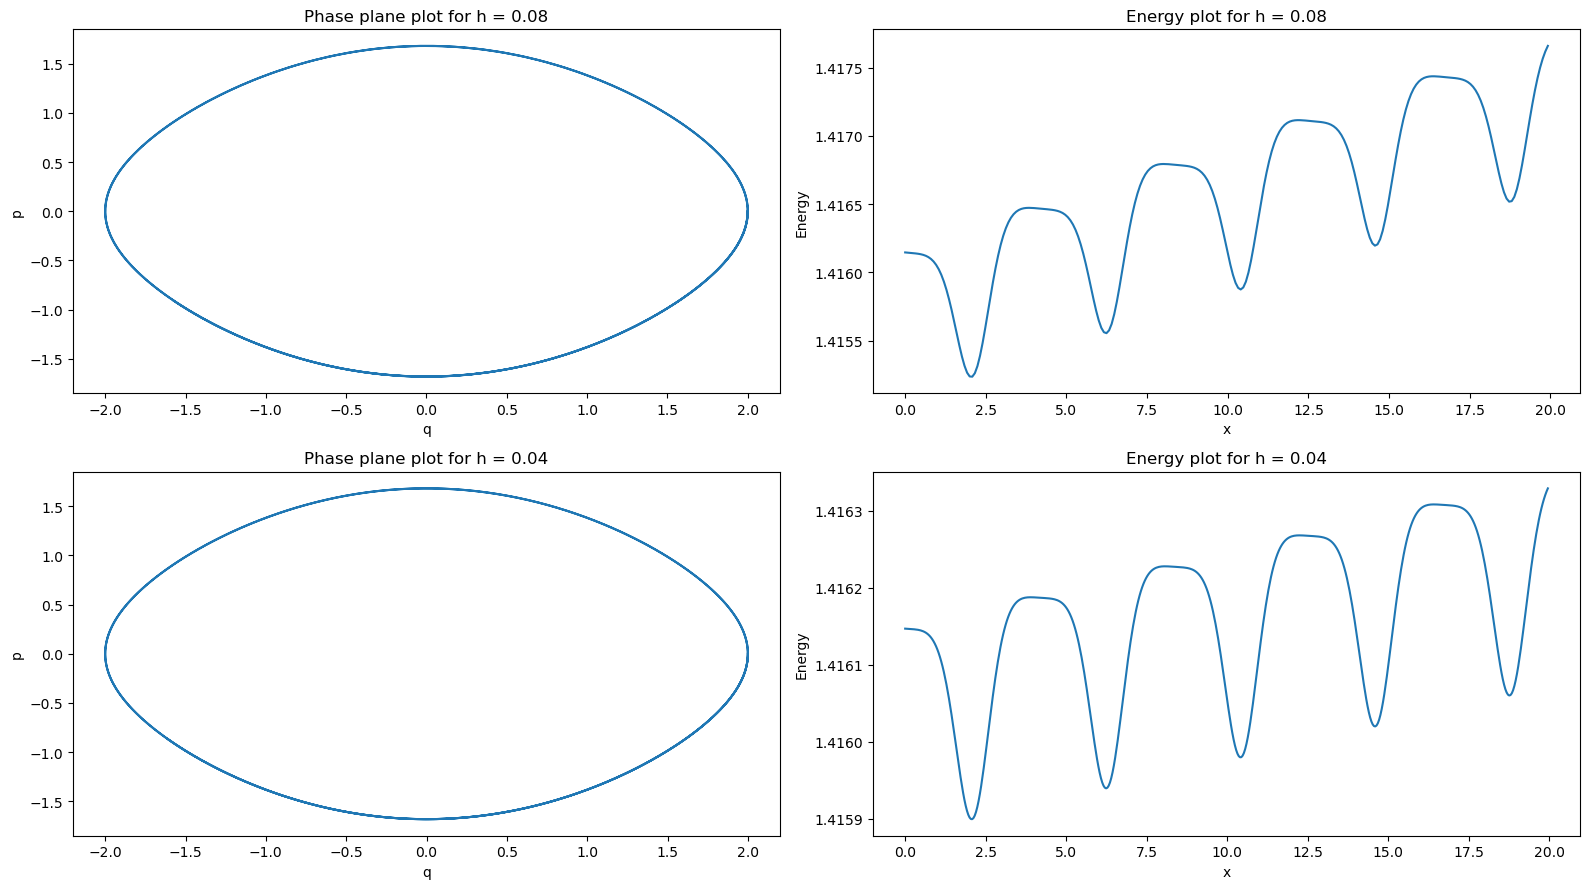

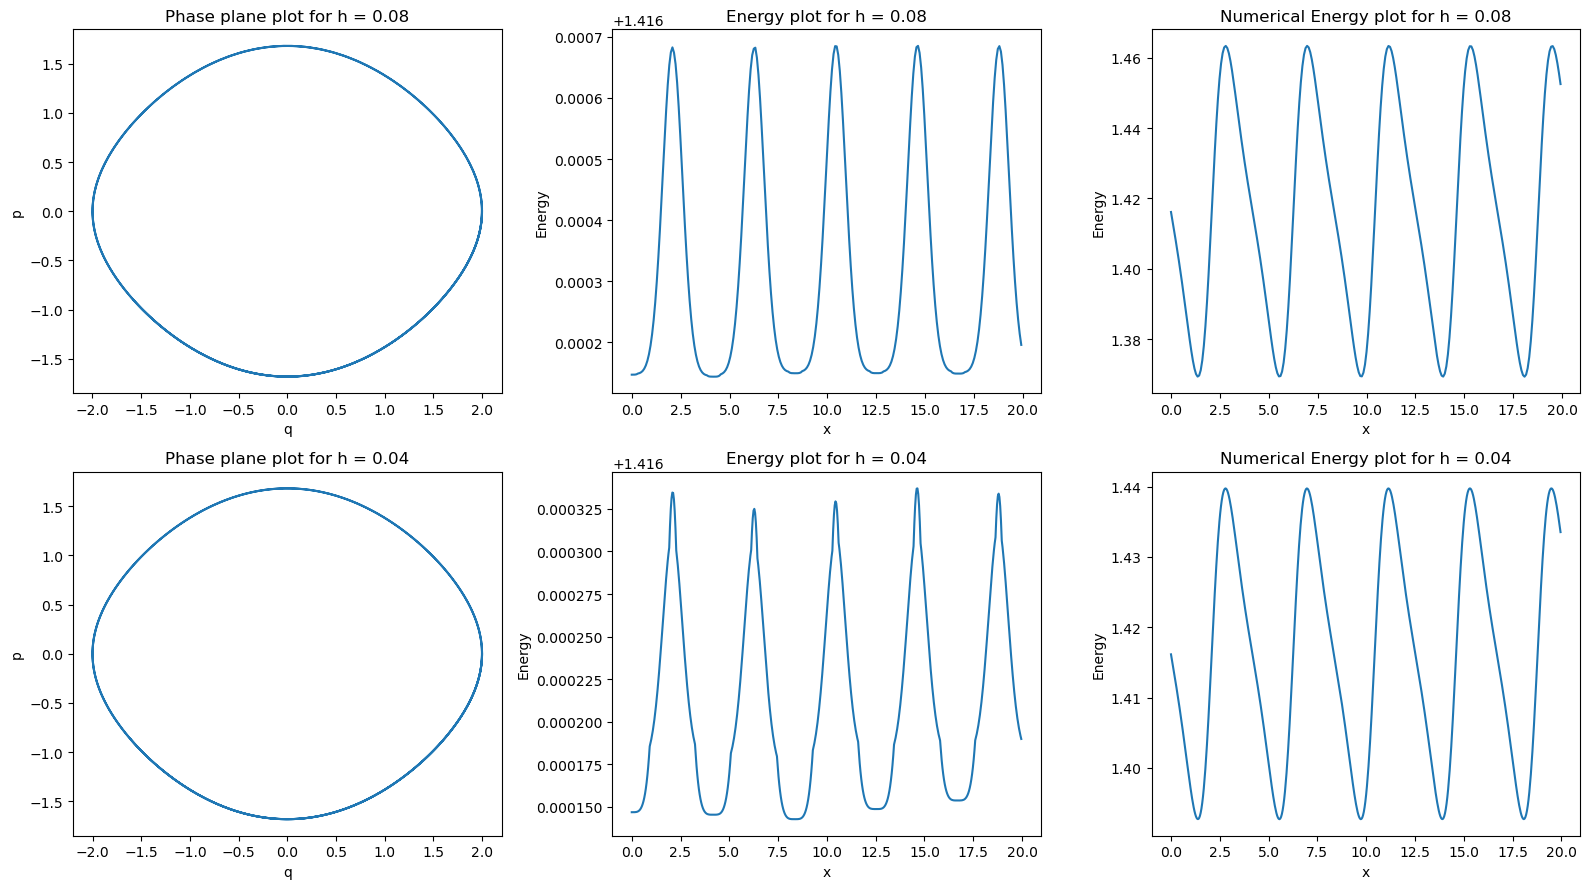

In [87]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ctypes
import itertools as it
from scipy.optimize import newton_krylov

def explicit_euler(f, t, h, initial):
    initial = initial.reshape(-1,1)
    t = t.reshape(-1,1)
    n, _ = initial.shape
    nt, _ = t.shape
    arr_results = np.zeros((n, nt))
    arr_results[:,0] = initial.flatten()
    for i in range(len(t)-1):
        arr_results[:,i+1] = arr_results[:,i] + h*f(arr_results[:,i].flatten(),t[i]).flatten()

    return arr_results

def symplectic_euler(f, t, h, initial):
    initial = initial.reshape(-1,1)
    t = t.reshape(-1,1)
    n, _ = initial.shape
    nt, _ = t.shape
    arr_results = np.zeros((n, nt))
    arr_results[:,0] = initial.flatten()
    for i in range(len(t)-1):
        # compute q
        arr_results[1,i+1] = arr_results[1,i] + h*arr_results[0,i]
        # compute p
        arr_results[0,i+1] = arr_results[0,i] - h*np.sin(arr_results[1,i+1])

    return arr_results

def explicit_euler_mod(f, t, h, initial):
    initial = initial.reshape(-1,1)
    t = t.reshape(-1,1)
    n, _ = initial.shape
    nt, _ = t.shape
    arr_results = np.zeros((n, nt))
    arr_results[:,0] = initial.flatten()
    for i in range(len(t)-1):
        k1 = f(arr_results[:,i],t[i])
        k2 = f(arr_results[:,i] + h*k1,t[i]+h)
        arr_results[:,i+1] = arr_results[:,i] + h*(0.5*k1 + 0.5*k2).flatten()
    return arr_results

def implicit_midpoint(f, t, h, initial):
    initial = initial.reshape(-1,1)
    t = t.reshape(-1,1)
    n, _ = initial.shape
    nt, _ = t.shape
    arr_results = np.zeros((n, nt))
    arr_results[:,0] = initial.flatten()
    k2 = np.zeros((2,1))   
    for i in range(len(t)-1):
        k1 = f(arr_results[:,i],t[i])
        # k2[0,0] = newton_krylov(lambda x: k2_eq(x, arr_results[1,i], h),0)
        # k2[1,0] = 2*arr_results[0,i]/h 
        k2 = newton_krylov(lambda x: x - h*f(arr_results[:,i] + 0.5*x,t[i]+0.5*h),[0,0])
        arr_results[:,i+1] = arr_results[:,i] + k2.flatten()
    return arr_results


def k2_eq(x, y0, h):
    return x + np.sin(y0+0.5*h*x)


def compute_energy(arr_p):
    return np.power(arr_p[0,:],2)/2 + 1- np.cos(arr_p[1,:]).flatten()

def compute_sym_euler_energy(arr_sol, h):
    return np.power(arr_sol[0,:],2)/2 + 0.5*h*arr_sol[0,:]*np.sin(arr_sol[1,:]) + (1-np.cos(arr_sol[1,:]))

def compute_ROC(arr_error, t):
    arr_exact = exact_test_sol(t)

    pass    





def exact_test_sol(x, Lambda): return np.exp(-Lambda*x)

def f(x, t): return np.array([-np.sin(x[1]), x[0]])



a = 0
b = 20
n = 100
initial= np.array([0,2])
h = [0.08, 0.04]
plot_type = ["phase plane", "energy"]


fig, axs = plt.subplots(nrows=len(h), ncols=2, figsize=(16,9))

for (step, pt), ax in zip(it.product(h,plot_type),axs.flat):
    t = np.arange(start=a, stop=b, step=step)
    s = explicit_euler(f, t, step, initial)
    energy = compute_energy(s)
    if pt == "energy":
        ax.plot(t, energy)
        ax.set_xlabel("x")
        ax.set_ylabel("Energy")
        ax.set_title(f'Energy plot for h = {step}')
    else:
        ax.plot(s[1,:],s[0,:])
        ax.set_xlabel("q")
        ax.set_ylabel("p")
        ax.set_title(f'Phase plane plot for h = {step}')    
    # ax.plot(s[1,:])

fig.tight_layout()

# Symplectic
fig, axs = plt.subplots(nrows=len(h), ncols=3, figsize=(16,9))
plot_type = ["phase plane", "energy", "numerical energy"]
for (step, pt), ax in zip(it.product(h,plot_type),axs.flat):
    t = np.arange(start=a, stop=b, step=step)
    s = symplectic_euler(f, t, step, initial)

    if pt == "energy":
        energy = compute_energy(s)
        ax.plot(t, energy)
        ax.set_xlabel("x")
        ax.set_ylabel("Energy")
        ax.set_title(f'Energy plot for h = {step}')
    elif pt == "numerical energy":
        energy = compute_sym_euler_energy(s, step)
        ax.plot(t, energy)
        ax.set_xlabel("x")
        ax.set_ylabel("Energy")
        ax.set_title(f'Numerical Energy plot for h = {step}')
    else:
        ax.plot(s[1,:],s[0,:])
        ax.set_xlabel("q")
        ax.set_ylabel("p")
        ax.set_title(f'Phase plane plot for h = {step}')    
    # ax.plot(s[1,:])

fig.tight_layout()


# Modified Euler
plot_type = ["phase plane", "energy"]


fig, axs = plt.subplots(nrows=len(h), ncols=2, figsize=(16,9))

for (step, pt), ax in zip(it.product(h,plot_type),axs.flat):
    t = np.arange(start=a, stop=b, step=step)
    s = explicit_euler_mod(f, t, step, initial)
    energy = compute_energy(s)
    if pt == "energy":
        ax.plot(t, energy)
        ax.set_xlabel("x")
        ax.set_ylabel("Energy")
        ax.set_title(f'Energy plot for h = {step}')
    else:
        ax.plot(s[1,:],s[0,:])
        ax.set_xlabel("q")
        ax.set_ylabel("p")
        ax.set_title(f'Phase plane plot for h = {step}')    
    # ax.plot(s[1,:])

fig.tight_layout()


# Implicit Midpoint
fig, axs = plt.subplots(nrows=len(h), ncols=3, figsize=(16,9))
plot_type = ["phase plane", "energy", "numerical energy"]
for (step, pt), ax in zip(it.product(h,plot_type),axs.flat):
    t = np.arange(start=a, stop=b, step=step)
    s = implicit_midpoint(f, t, step, initial)

    if pt == "energy":
        energy = compute_energy(s)
        ax.plot(t, energy)
        ax.set_xlabel("x")
        ax.set_ylabel("Energy")
        ax.set_title(f'Energy plot for h = {step}')
        print(energy[:10])
    elif pt == "numerical energy":
        energy = compute_sym_euler_energy(s, step)
        ax.plot(t, energy)
        ax.set_xlabel("x")
        ax.set_ylabel("Energy")
        ax.set_title(f'Numerical Energy plot for h = {step}')
    else:
        ax.plot(s[1,:],s[0,:])
        ax.set_xlabel("q")
        ax.set_ylabel("p")
        ax.set_title(f'Phase plane plot for h = {step}')    
    # ax.plot(s[1,:])

fig.tight_layout()
